# マンデルブロ集合

マンデルブロ集合を描画する

In [203]:
function mandelimg(a, b; n=5)
    z = mandelbrot(a, b, n=n)
    za = abs(z)
    if isnan(za)
        return zero(za)
    elseif isinf(za)
        return one(za)
    else
        return max(min(log(za), one(za)), zero(za))
    end
end

function mandelbrot(a, b;n=5)
    c::ComplexF64 = a + b*im
    z = zero(ComplexF64)
    for i in 1:n
        z = z_mandelbrot(z, c)
    end
    return z
end

z_mandelbrot(z::ComplexF64, c) = z^2 + c

z_mandelbrot (generic function with 1 method)

In [191]:
x = mandelbrot(1, 2)

-1.637471e6 + 1.305898e6im

In [66]:
mandelimg(0.16, 0.2)

0.2696307331151975

In [30]:
using Images

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278


┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1278
┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1278
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278


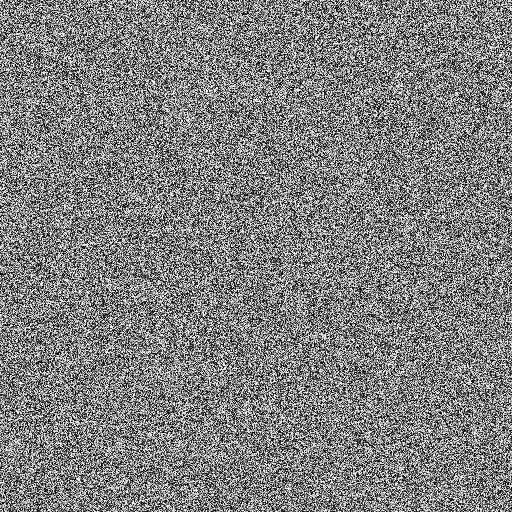

In [33]:
x = rand(512, 512)
x = Gray.(x)

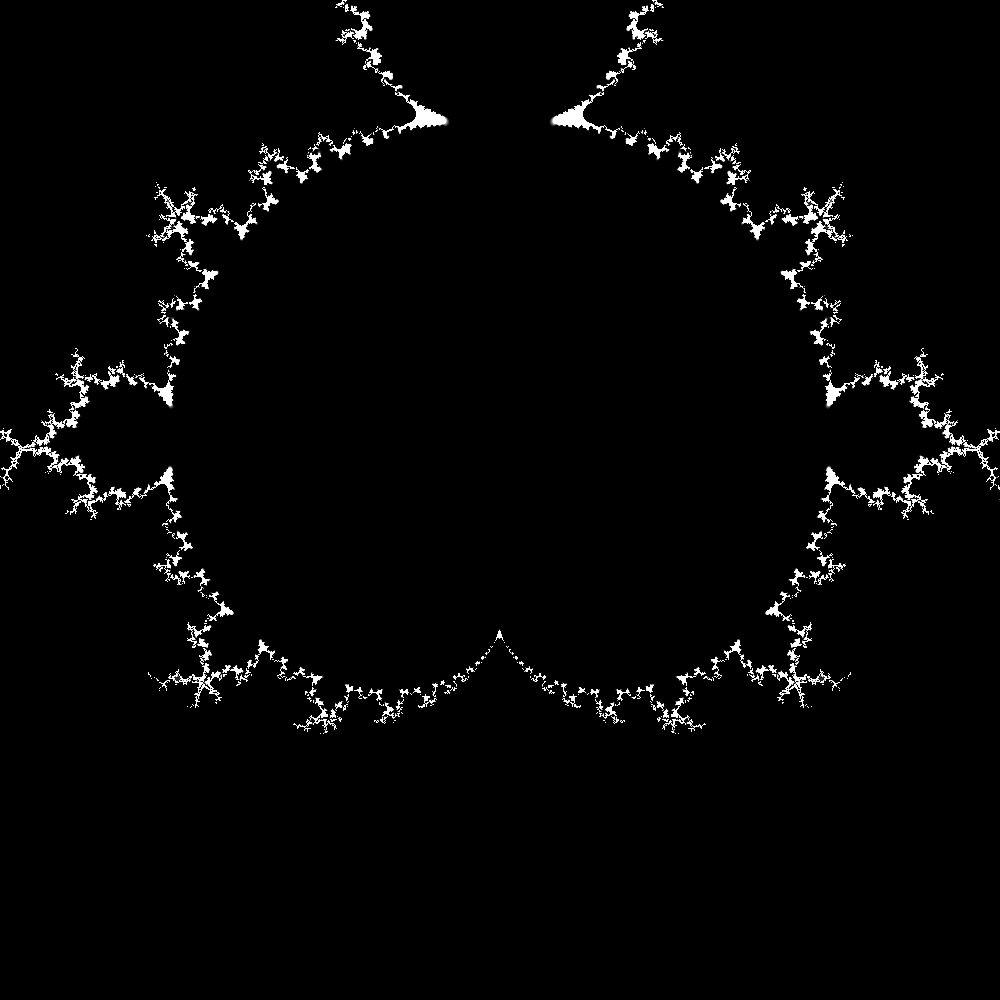

In [204]:
N = 1000
function nm(x::Integer ;N=N, r=1.0)
    return r * (x - N/2) / N
end
imgarr = map(Iterators.product(1:N, 1:N)) do (x, y)
    mandelimg(nm(x, r=2.0), nm(y, r=2.0);n=28)
end
img = Gray.(imgarr)

In [205]:
save("mandelbrot-example1.png", img)

0

In [201]:
maximum(img)